In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [4]:
continuous = ['TV', 'radio', 'newspaper', 'sales']

In [5]:
df[continuous].describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


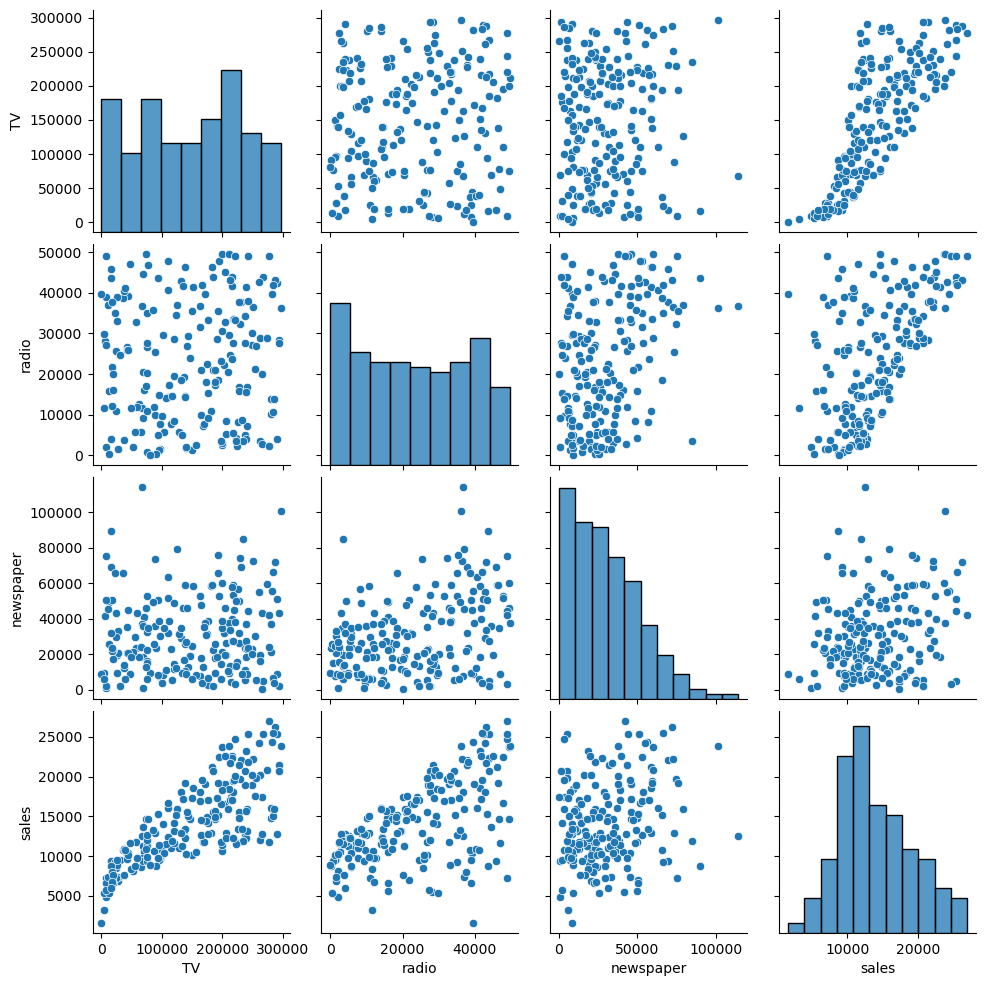

In [6]:
sns.pairplot(df)

In [7]:
df[continuous].skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

<Axes: >

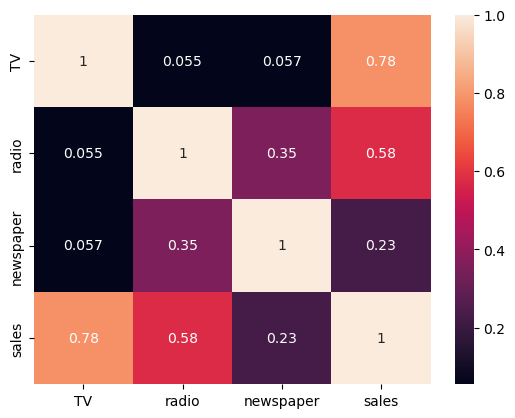

In [8]:
sns.heatmap(df[continuous].corr(),annot=True)

In [9]:
import statsmodels.formula.api as smf
rsq_TV = smf.ols('TV ~ radio + newspaper', data=df).fit().rsquared
vif_TV = 1/(1-rsq_TV)

rsq_radio = smf.ols('radio ~ TV + newspaper',data=df).fit().rsquared
vif_radio = 1/(1-rsq_radio)

rsq_newspaper = smf.ols('newspaper ~ TV + radio',data=df).fit().rsquared
vif_newspaper = 1/(1-rsq_newspaper)

d1 = {'Variables' : ['TV', 'radio', 'newspaper'] ,'VIF' : [vif_TV,vif_radio,vif_newspaper]}
vif_frame = pd.DataFrame(d1)
vif_frame

# A VIF value of 1 indicates no multicollinearity.
# A VIF value between 1 and 5 suggests moderate multicollinearity.
# A VIF value greater than 5 suggests high multicollinearity.

,Variables,VIF
0,TV,1.004611
1,radio,1.144952
2,newspaper,1.145187


In [10]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [11]:
Train = []
CV = []

for i in range (0,100):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)

    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train,y_train)

    from sklearn.metrics import r2_score

    ypred_train = model.predict(X_train)
    Train.append(r2_score(y_train,ypred_train))

    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(model,X_train,y_train,cv=5,scoring='r2').mean())

em = pd.DataFrame({'Train' : Train , 'CV' : CV})
gm = em[(abs(em['Train']-em['CV'])<=0.05)]
rs = gm[gm['CV']==gm['CV'].max()].index.tolist()[0]
print('best random state number :',rs)

best random state number : 10


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Coefficent :',model.coef_)
print('Intercept :',model.intercept_)

Coefficent : [ 0.0437726   0.19343299 -0.00222879]
Intercept : 3254.0971144188843


In [14]:
ypred_train = model.predict(X_train)

from sklearn.metrics import r2_score,mean_squared_error
print('Train R2 : ', r2_score(y_train,ypred_train))

ypred_test = model.predict(X_test)
print('Test R2 : ', r2_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('CV : ',cross_val_score(model,X_train,y_train,cv=5).mean())

Train R2 :  0.9209087553499528
Test R2 :  0.8353672324670594
CV :  0.9157327701186169


In [15]:
print('Train RMSE : ',np.sqrt(mean_squared_error(y_train,ypred_train)))
print('Test RMSE : ',np.sqrt(mean_squared_error(y_test,ypred_test)))

Train RMSE :  1363.30358722819
Test RMSE :  2588.5298446278102


In [16]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size=0.8,random_state=10)

import statsmodels.formula.api as smf
model1 = smf.ols('y_train~X_train',data=df_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.5
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           1.09e-85
Time:                        15:28:57   Log-Likelihood:                -1381.9
No. Observations:                 160   AIC:                             2772.
Df Residuals:                     156   BIC:                             2784.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3254.0971    286.349     11.364      0.000    2688.475    3819.719
X_train[0]     0.0438      0.001     32.429      0.000       0.041       0.046
X_train[1]     0.1934      0.008     24.310      0.000       0.178       0.209
X_train[2]    -0.0022      0.005     -0.415      0.679      -0.013       0.008
==============================================================================
Omnibus:                       12.534   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.333
Skew:                          -0.697   Prob(JB):                      0.00127
Kurtosis:                       3.233   Cond. No.                     4.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

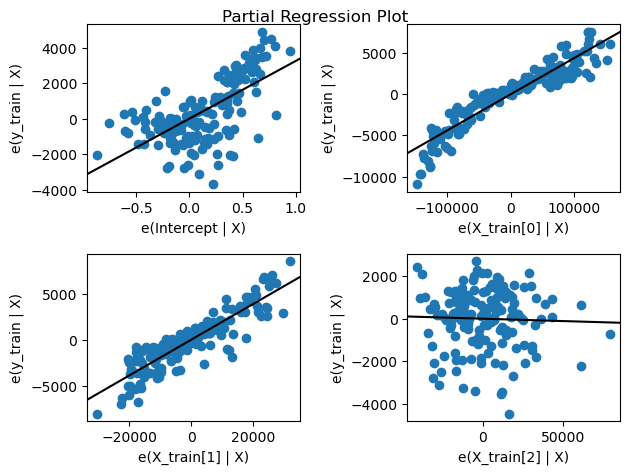

In [17]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)
plt.show()

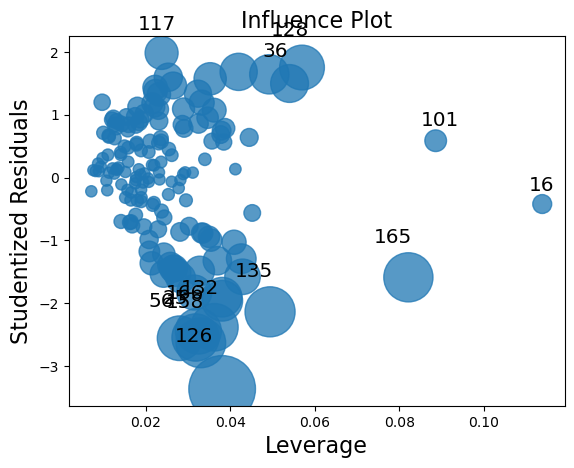

In [18]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)
plt.show()

In [19]:
df.drop(index = [130,5,75,165,101,16,128,36],inplace=True)

X = df.drop(columns=['sales'])
y = df['sales']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Coefficent :',model.coef_)
print('Intercept :',model.intercept_)

ypred_train = model.predict(X_train)

from sklearn.metrics import r2_score,mean_squared_error
print('Train R2 : ', r2_score(y_train,ypred_train))

ypred_test = model.predict(X_test)
print('Test R2 : ', r2_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('CV : ',cross_val_score(model,X_train,y_train,cv=5).mean())

Coefficent : [0.04231835 0.19018805 0.01162628]
Intercept : 3187.802420142445
Train R2 :  0.9186337181540609
Test R2 :  0.8901435248440224
CV :  0.9039524436092407


In [23]:
from sklearn.model_selection import train_test_split
df_train,df_test= train_test_split(df,test_size=0.2,random_state=10)

import statsmodels.formula.api as smf
model2 = smf.ols('y_train~X_train',data=df_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     560.7
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           6.32e-81
Time:                        15:34:13   Log-Likelihood:                -1330.4
No. Observations:                 153   AIC:                             2669.
Df Residuals:                     149   BIC:                             2681.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3187.8024    305.095     10.449      0.000    2584.932    3790.673
X_train[0]     0.0423      0.001     29.315      0.000       0.039       0.045
X_train[1]     0.1902      0.009     21.513      0.000       0.173       0.208
X_train[2]     0.0116      0.007      1.666      0.098      -0.002       0.025
==============================================================================
Omnibus:                       12.667   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.043
Skew:                          -0.742   Prob(JB):                     0.000893
Kurtosis:                       2.985   Cond. No.                     4.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df.drop(columns=['newspaper'],inplace=True)

X = df.drop(columns=['sales'])
y = df['sales']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Coefficent :',model.coef_)
print('Intercept :',model.intercept_)

ypred_train = model.predict(X_train)

from sklearn.metrics import r2_score,mean_squared_error
print('Train R2 : ', r2_score(y_train,ypred_train))

ypred_test = model.predict(X_test)
print('Test R2 : ', r2_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('CV : ',cross_val_score(model,X_train,y_train,cv=5).mean())

Coefficent : [0.04254012 0.19615138]
Intercept : 3357.7202283404695
Train R2 :  0.9171180924161672
Test R2 :  0.8971081979513411
CV :  0.9037797241797525


In [31]:
from sklearn.model_selection import train_test_split
df_train,df_test= train_test_split(df,test_size=0.2,random_state=10)

import statsmodels.formula.api as smf
model3 = smf.ols('y_train~X_train',data=df_train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     829.9
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           7.66e-82
Time:                        15:39:10   Log-Likelihood:                -1331.8
No. Observations:                 153   AIC:                             2670.
Df Residuals:                     150   BIC:                             2679.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3357.7202    289.238     11.609      0.000    2786.213    3929.227
X_train[0]     0.0425      0.001     29.422      0.000       0.040       0.045
X_train[1]     0.1962      0.008     24.123      0.000       0.180       0.212
==============================================================================
Omnibus:                       13.858   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.419
Skew:                          -0.776   Prob(JB):                     0.000449
Kurtosis:                       3.093   Cond. No.                     4.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""